In [12]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import sys
from bs4 import BeautifulSoup
import os
import geopy
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [40]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [18]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [66]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'CMRKX2SFYBIXFJCO31DQNE5JO3QTJ4X1JRGU5HZGYLHWBRDR'
    CLIENT_SECRET = '13U1SS0VIV2RDKUBX25IOYUHA1ISG51F20JSIH5GMW40API1'
    VERSION = '20200406' # Foursquare API version
        #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [67]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'CMRKX2SFYBIXFJCO31DQNE5JO3QTJ4X1JRGU5HZGYLHWBRDR' 
    CLIENT_SECRET = '13U1SS0VIV2RDKUBX25IOYUHA1ISG51F20JSIH5GMW40API1' 
    VERSION = '20200406' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [68]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [69]:
# get new york data
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [70]:
new_york_data.shape

(306, 4)

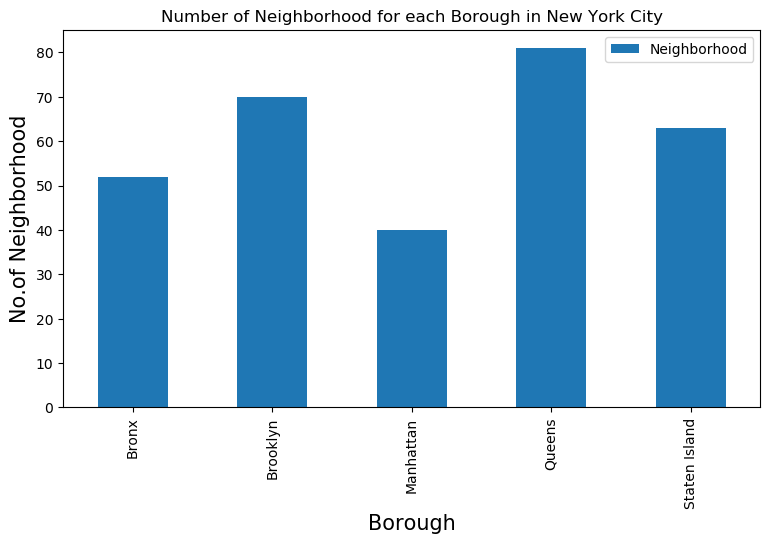

In [71]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [72]:
CLIENT_ID = 'CMRKX2SFYBIXFJCO31DQNE5JO3QTJ4X1JRGU5HZGYLHWBRDR' # your Foursquare ID
CLIENT_SECRET = '13U1SS0VIV2RDKUBX25IOYUHA1ISG51F20JSIH5GMW40API1' # your Foursquare Secret
VERSION = '20200406'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CMRKX2SFYBIXFJCO31DQNE5JO3QTJ4X1JRGU5HZGYLHWBRDR
CLIENT_SECRET:13U1SS0VIV2RDKUBX25IOYUHA1ISG51F20JSIH5GMW40API1


In [93]:

# prepare neighborhood list that contains mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
mexican_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mexican_restaurants=venues[venues['Category']=='Mexican Restaurant']   
    print('(',count,'/',len(new_york_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(mexican_restaurants)))
    for restaurant_detail in mexican_restaurants.values.tolist():
        id, name , category=restaurant_detail
        mexican_rest_ny = mexican_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

done
( 1 / 306 ) Mexican Restaurants in Wakefield, Bronx:0
done
( 2 / 306 ) Mexican Restaurants in Co-op City, Bronx:2
done
( 3 / 306 ) Mexican Restaurants in Eastchester, Bronx:0
done
( 4 / 306 ) Mexican Restaurants in Fieldston, Bronx:3
done
( 5 / 306 ) Mexican Restaurants in Riverdale, Bronx:2
done
( 6 / 306 ) Mexican Restaurants in Kingsbridge, Bronx:6
done
( 7 / 306 ) Mexican Restaurants in Marble Hill, Manhattan:3
done
( 8 / 306 ) Mexican Restaurants in Woodlawn, Bronx:0
done
( 9 / 306 ) Mexican Restaurants in Norwood, Bronx:2
done
( 10 / 306 ) Mexican Restaurants in Williamsbridge, Bronx:0
done
( 11 / 306 ) Mexican Restaurants in Baychester, Bronx:2
done
( 12 / 306 ) Mexican Restaurants in Pelham Parkway, Bronx:1
done
( 13 / 306 ) Mexican Restaurants in City Island, Bronx:0
done
( 14 / 306 ) Mexican Restaurants in Bedford Park, Bronx:2
done
( 15 / 306 ) Mexican Restaurants in University Heights, Bronx:2
done
( 16 / 306 ) Mexican Restaurants in Morris Heights, Bronx:1
done
( 17 /

KeyError: 'groups'

In [88]:
mexican_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,5c47a4b21953f3002c558218,Chipotle Mexican Grill
1,Bronx,Co-op City,58582b156431e554e165d909,Moe's Southwest Grill
2,Bronx,Fieldston,523f6e14498ef6fdefc0d690,Burrito Shop
3,Bronx,Fieldston,4b78ba71f964a5209fdf2ee3,Santa Fe Grill & Bar
4,Bronx,Fieldston,5ce9664e3731ee002baae6ed,Estrellita Poblana


In [98]:
mexican_rest_ny.shape

(171, 4)

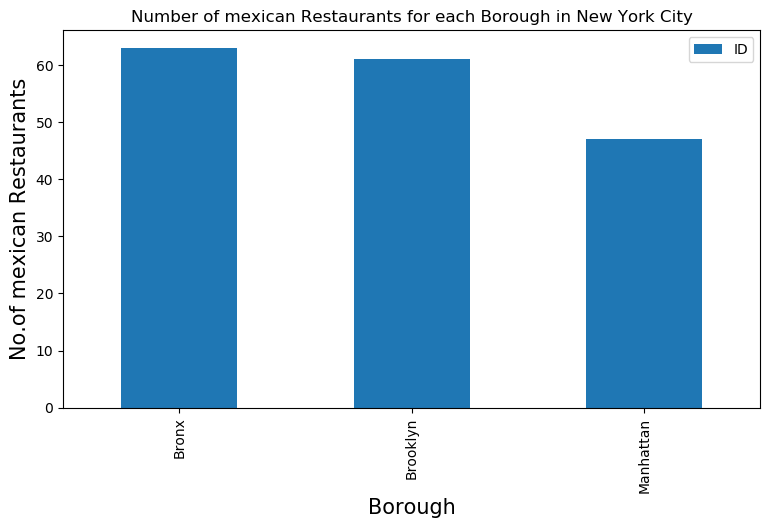

In [99]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of mexican Restaurants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of mexican Restaurants', fontsize=15)
#giving a bar plot
mexican_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

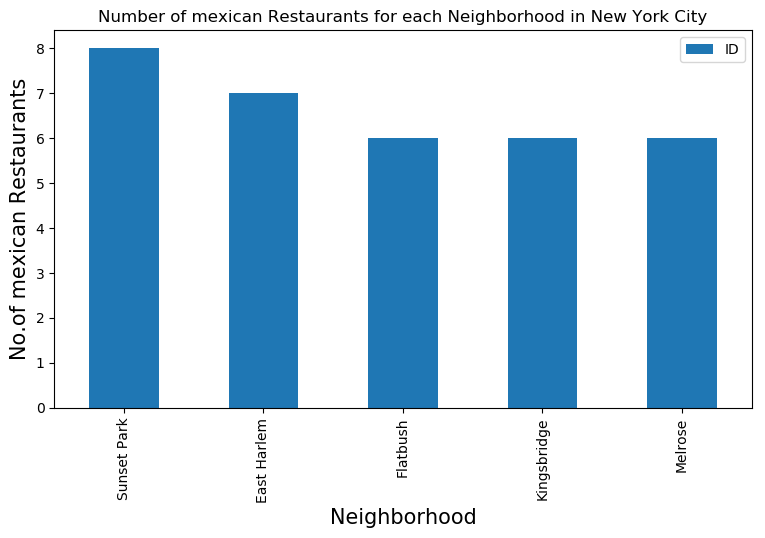

In [100]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of mexican Restaurants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of mexican Restaurants', fontsize=15)
#giving a bar plot
mexican_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [94]:
# prepare neighborhood list that contains mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
mexican_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in mexican_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these restaurants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(mexican_rest_ny),')','processed')
    mexican_rest_stats_ny = mexican_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                    Name  Likes  Rating  Tips
0  5c47a4b21953f3002c558218  Chipotle Mexican Grill      0     7.5     0
( 1 / 171 ) processed
                         ID                   Name  Likes  Rating  Tips
0  58582b156431e554e165d909  Moe's Southwest Grill      1     6.7     0
( 2 / 171 ) processed
                         ID          Name  Likes  Rating  Tips
0  523f6e14498ef6fdefc0d690  Burrito Shop     10     7.0     4
( 3 / 171 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4b78ba71f964a5209fdf2ee3  Santa Fe Grill & Bar     11     6.2    17
( 4 / 171 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 5ce9664e3731ee002baae6ed
( 5 / 171 ) processed
                         ID           Name  Likes  Rating  Tips
0  590e5d2ce96d0c61de2dcf1d  Cocina Chente     15     8.9     5
( 6 / 171 ) processed
                         ID    Name  Likes  Rating  Tips
0  4db4

In [95]:
mexican_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Co-op City,5c47a4b21953f3002c558218,Chipotle Mexican Grill,0,7.5,0
1,Bronx,Co-op City,58582b156431e554e165d909,Moe's Southwest Grill,1,6.7,0
2,Bronx,Fieldston,523f6e14498ef6fdefc0d690,Burrito Shop,10,7.0,4
3,Bronx,Fieldston,4b78ba71f964a5209fdf2ee3,Santa Fe Grill & Bar,11,6.2,17
4,Bronx,Fieldston,0,0,0,0.0,0


In [96]:
mexican_rest_stats_ny.shape

(171, 7)

In [97]:
mexican_rest_ny.shape

(171, 4)

In [101]:
mexican_rest_stats_ny.to_csv('mexican_rest_stats_ny.csv', index=False)

In [102]:
mexican_rest_stats_ny_csv=pd.read_csv('mexican_rest_stats_ny.csv')

In [103]:
mexican_rest_stats_ny_csv.shape

(171, 7)

In [104]:
mexican_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Co-op City,5c47a4b21953f3002c558218,Chipotle Mexican Grill,0,7.5,0
1,Bronx,Co-op City,58582b156431e554e165d909,Moe's Southwest Grill,1,6.7,0
2,Bronx,Fieldston,523f6e14498ef6fdefc0d690,Burrito Shop,10,7.0,4
3,Bronx,Fieldston,4b78ba71f964a5209fdf2ee3,Santa Fe Grill & Bar,11,6.2,17
4,Bronx,Fieldston,0,0,0,0.0,0


In [105]:
mexican_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
Borough         171 non-null object
Neighborhood    171 non-null object
ID              171 non-null object
Name            171 non-null object
Likes           171 non-null object
Rating          171 non-null float64
Tips            171 non-null object
dtypes: float64(1), object(6)
memory usage: 9.4+ KB


In [106]:
mexican_rest_stats_ny['Likes']=mexican_rest_stats_ny['Likes'].astype('float64')

In [107]:
mexican_rest_stats_ny['Tips']=mexican_rest_stats_ny['Tips'].astype('float64')

In [108]:
mexican_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
Borough         171 non-null object
Neighborhood    171 non-null object
ID              171 non-null object
Name            171 non-null object
Likes           171 non-null float64
Rating          171 non-null float64
Tips            171 non-null float64
dtypes: float64(3), object(4)
memory usage: 9.4+ KB


In [109]:
# Restaurant with maximum Likes
mexican_rest_stats_ny.iloc[mexican_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              431e2d80f964a52079271fe3
Name                          La Esquina
Likes                               1992
Rating                                 9
Tips                                 722
Name: 168, dtype: object

In [110]:
# Restaurant with maximum Rating
mexican_rest_stats_ny.iloc[mexican_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5a38273a005ac129b7a93010
Name                        La Loncheria
Likes                                 52
Rating                               9.2
Tips                                  15
Name: 94, dtype: object

In [111]:
# Restaurant with maximum Tips
mexican_rest_stats_ny.iloc[mexican_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              431e2d80f964a52079271fe3
Name                          La Esquina
Likes                               1992
Rating                                 9
Tips                                 722
Name: 168, dtype: object

In [112]:
ny_neighborhood_stats=mexican_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [116]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).tail(10)

,Neighborhood,Average Rating
45,Midwood,6.1
62,Schuylerville,5.2
65,Spuyten Duyvil,5.0
24,Fieldston,4.4
68,University Heights,4.2
54,Olinville,4.2
19,East Flatbush,0.0
7,Canarsie,0.0
46,Morris Heights,0.0
57,Pelham Parkway,0.0


In [117]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
38,Little Italy,9.000000
63,Soho,9.000000
30,Greenpoint,8.900000
75,Windsor Terrace,8.800000
22,East Williamsburg,8.800000
10,Chinatown,8.750000
6,Bushwick,8.720000
72,West Village,8.700000
21,East Village,8.700000
40,Lower East Side,8.666667


In [118]:
ny_borough_stats=mexican_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [121]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.159574
1,Brooklyn,7.631148
0,Bronx,6.711111


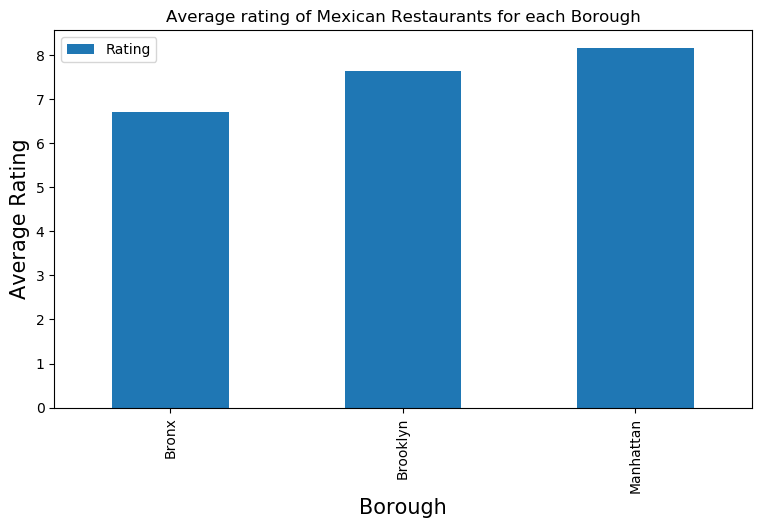

In [122]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Mexican Restaurants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
mexican_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [125]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']<=6.0]

In [126]:
ny_neighborhood_stats

,Neighborhood,Average Rating
7,Canarsie,0.0
19,East Flatbush,0.0
24,Fieldston,4.4
46,Morris Heights,0.0
54,Olinville,4.2
57,Pelham Parkway,0.0
62,Schuylerville,5.2
65,Spuyten Duyvil,5.0
68,University Heights,4.2


In [127]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [128]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [129]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Canarsie,40.635564,-73.902093,0.0
1,Brooklyn,East Flatbush,40.641718,-73.936103,0.0
2,Bronx,Fieldston,40.895437,-73.905643,4.4
3,Bronx,Morris Heights,40.847898,-73.919672,0.0
4,Bronx,Olinville,40.871371,-73.863324,4.2
5,Bronx,Pelham Parkway,40.857413,-73.854756,0.0
6,Bronx,Schuylerville,40.826580,-73.826203,5.2
7,Bronx,Spuyten Duyvil,40.881395,-73.917190,5.0
8,Bronx,University Heights,40.855727,-73.910416,4.2


In [138]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [139]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [140]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [141]:
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)